<a href="https://colab.research.google.com/github/Rashida-Rangwala/AdEase_Casestudy/blob/main/AdEase_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ad Company**

Ad Company is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad Company trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

**train_1.csv**

Each row represents an article, and each column represents a date.
The values indicate the number of visits on that date.
The page name follows this format:

**SPECIFIC_NAME _ LANGUAGE.wikipedia.org _ ACCESS_TYPE _ ACCESS_ORIGIN**

**SPECIFIC_NAME**: Article name<br>
**LANGUAGE**: Wikipedia language version<br>
**ACCESS_TYPE**: Device type used (desktop/mobile)<br>
**ACCESS_ORIGIN**: Request origin (spider or browser)<br>


**Exog_Campaign_eng.csv**

Contains data on campaign events that might impact page views.<br>
Applies **only to English pages**.<br>
**1** indicates a campaign/event, **0** means no event.<br>
This can be used as an external factor while training models for forecasting.<br>

In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

**train_1.csv**

Each row represents an article, and each column represents a date.
The values indicate the number of visits on that date.
The page name follows this format:

**SPECIFIC_NAME _ LANGUAGE.wikipedia.org _ ACCESS_TYPE _ ACCESS_ORIGIN**

**SPECIFIC_NAME**: Article name<br>
**LANGUAGE**: Wikipedia language version<br>
**ACCESS_TYPE**: Device type used (desktop/mobile)<br>
**ACCESS_ORIGIN**: Request origin (spider or browser)<br>


**Exog_Campaign_eng.csv**

Contains data on campaign events that might impact page views.<br>
Applies **only to English pages**.<br>
**1** indicates a campaign/event, **0** means no event.<br>
This can be used as an external factor while training models for forecasting.<br>

In [3]:
exog = pd.read_csv("/home/csc/my_first_environment/adease/data/Exog_Campaign_eng")
exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [4]:
exog.describe()

,Exog
count,550.000000
mean,0.098182
std,0.297831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


Exog data doesn't have any Nulls. We will use it later on when required while creating the ML model.

In [4]:
train = pd.read_csv('/home/csc/my_first_environment/adease/data/train_1.csv')

In [11]:
train.shape

(145063, 551)

In [5]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [14]:
train.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


# **Checking missing values using plot:**

In [15]:
train.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

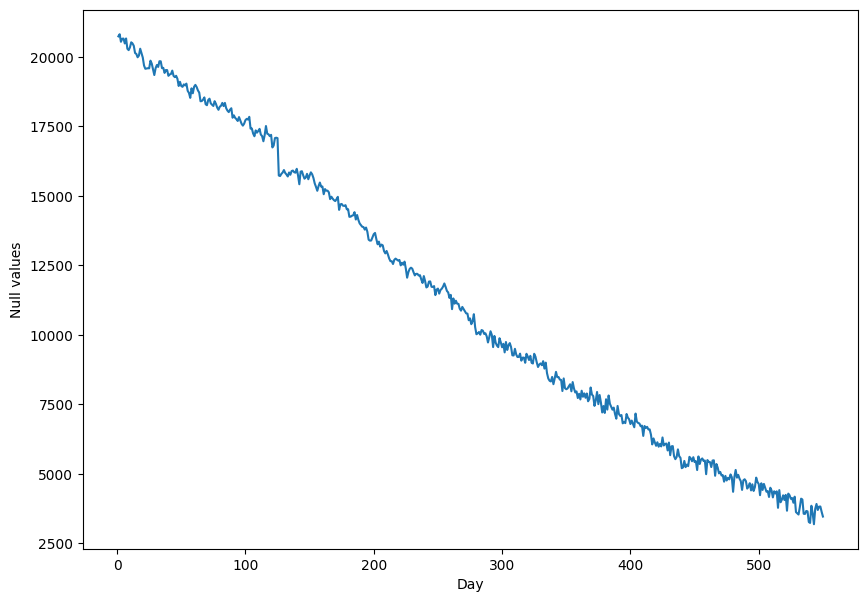

In [21]:
plt.figure(figsize=(10,7))
plt.xlabel('Day')
plt.ylabel('Null values')
plt.plot(range(1, len(train.columns)), train.isnull().sum()[1:])

From the plot above, we can see that the number of null values decreases over time. This suggests that these pages were not created initially, which is why they have no views.  

To clean the data, we first remove rows where all values are NULL. Then, we drop rows with more than 300 null values. Since we have a total of 551 records, keeping rows with over 300 null values would mean that more than half of the data is missing, which would not be useful for model creation.


In [5]:
print(train.shape)
train=train.dropna(how='all')
#‘all’ : If all values are NA, drop that row or column.
print(train.shape)


(145063, 551)
(145063, 551)


We haven't lost much data after the removal of NULLs so we can proceed with the cleaned data now.

Filling all the remaining NULLs with 0

In [6]:
train=train.fillna(0)

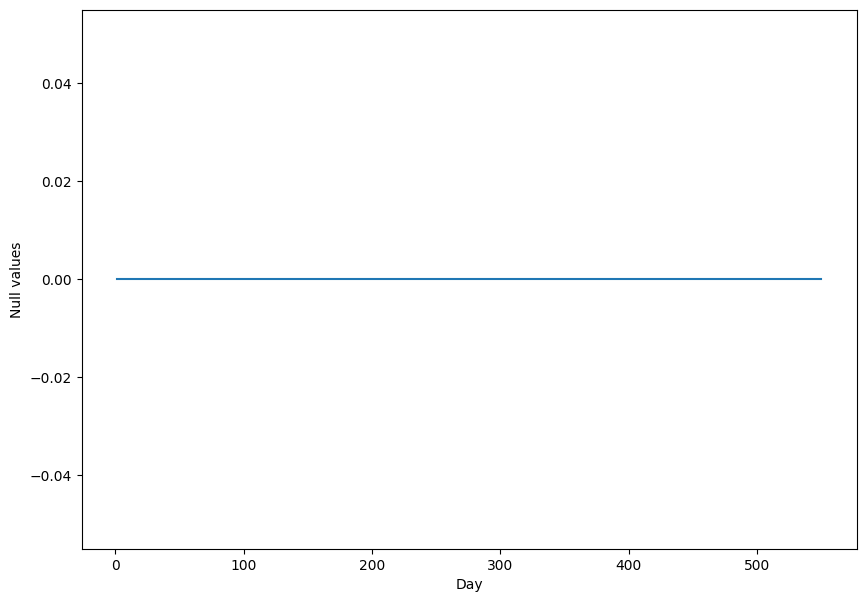

In [25]:
plt.figure(figsize=(10,7))
plt.xlabel('Day')
plt.ylabel('Null values')
plt.plot(range(1, len(train.columns)), train.isnull().sum()[1:])

# **EDA**

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

We will split the data given in the page name column to find out the different parts of the data.

In [7]:
# Function to split page name
def split_page(page):
    parts = page.rsplit('_', 3)  # Split only the last 3 occurrences of '_'
    title = parts[0].rsplit('.', 1)[0]  # Remove any trailing extension
    language = parts[-3].split('.')[0]  # Extract language before ".wikipedia.org"
    return title, language, parts[-2], parts[-1]

# Apply function and create DataFrame
df_split = train['Page'].astype(str).apply(split_page).apply(pd.Series)
df_split.columns = ['Title', 'Language', 'Access_type', 'Access_origin']

# Merge with original data
df = pd.concat([train, df_split], axis=1)

df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,zh,all-access,spider


We have got 4 new columns after spliting the Page column - Title, Language, Access_type, Access_origin

In [10]:
df["Language"].value_counts()

Language
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: count, dtype: int64

In [8]:
lang_dict ={'de':'German',
 'en':'English',
 'es': 'Spanish',
 'fr': 'French',
 'ja': 'Japenese' ,
 'ru': 'Russian',
 'zh': 'Chinese','commons': 'Unknown_Language','www':'Unknown_Language'}

df["Language"]=df["Language"].map(lang_dict)
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,Chinese,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,Chinese,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,Chinese,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,Chinese,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52_Hz_I_Love_You,Chinese,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,12.0,13.0,3.0,5.0,10.0,Underworld_(serie_de_películas),Spanish,all-access,spider
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Resident_Evil:_Capítulo_Final,Spanish,all-access,spider
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Enamorándome_de_Ramón,Spanish,all-access,spider
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Hasta_el_último_hombre,Spanish,all-access,spider


In [54]:
df["Language"].value_counts() / len(df) * 100


Language
English             16.618986
Japenese            14.084225
German              12.785479
Unknown_Language    12.308445
French              12.271909
Chinese             11.876909
Russian             10.355501
Spanish              9.698545
Name: count, dtype: float64

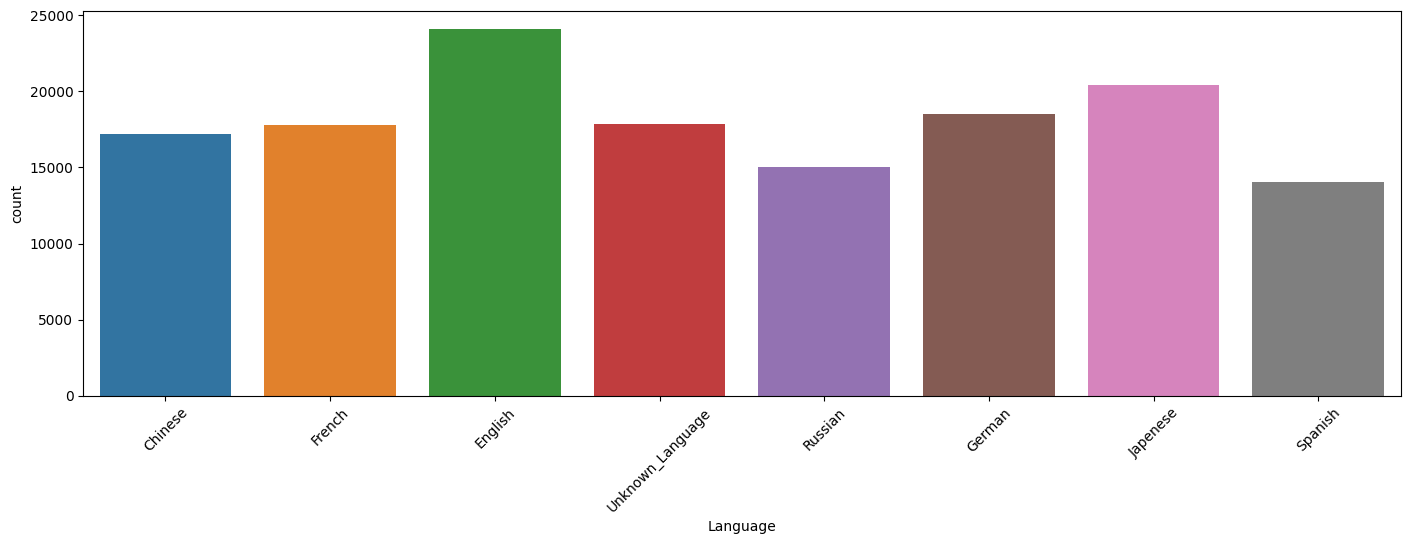

In [53]:
plt.figure(figsize=(17, 5))
sns.countplot(x=df["Language"])
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Access_type', ylabel='count'>

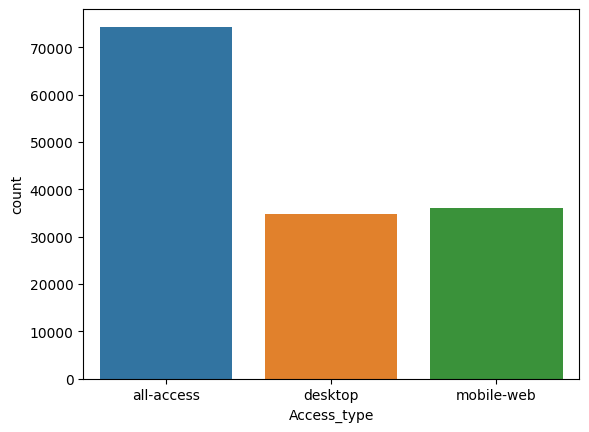

In [37]:
sns.countplot(x=df["Access_type"])

In [55]:
df["Access_type"].value_counts() / len(df) * 100


Access_type
all-access    51.229466
mobile-web    24.774753
desktop       23.995781
Name: count, dtype: float64

<Axes: xlabel='Access_origin', ylabel='count'>

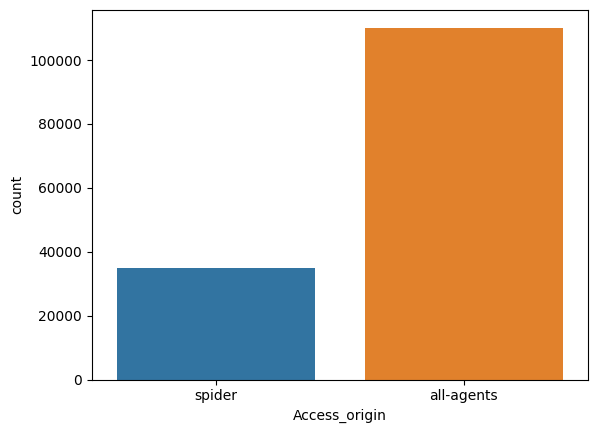

In [38]:
sns.countplot(x=df["Access_origin"])

In [56]:
df["Access_origin"].value_counts() / len(df) * 100

Access_origin
all-agents    75.932526
spider        24.067474
Name: count, dtype: float64

Based on the language data we have, let's create a dataframe for languages and store the mean of those date wise and check how each language performs

In [9]:
df_lang = df.groupby("Language").mean(numeric_only=True)
df_lang

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
Chinese,240.582042,240.941958,239.344071,241.653491,257.779674,259.114864,258.832260,265.589529,263.964420,274.414592,...,345.165129,340.420338,360.738580,381.322886,376.447443,376.019618,378.048639,350.719427,354.704452,365.579256
English,3513.862203,3502.511407,3325.357889,3462.054256,3575.520035,3849.736021,3643.523063,3437.871080,3517.459391,3497.571594,...,4997.991248,4683.314294,4971.831757,5140.463373,5770.371661,6040.680728,5860.227559,6245.127510,5201.783018,5127.916418
French,475.150994,478.202000,459.837659,491.508932,482.557746,502.741209,485.945399,476.998820,472.061903,445.495057,...,652.004719,639.459443,618.215931,666.639085,936.884788,858.413100,774.155769,752.712954,700.543422,646.258342
German,714.968405,705.229741,676.877231,621.145145,722.076185,794.832480,770.814256,782.077641,752.939990,701.702593,...,828.738017,839.025934,810.756187,1281.088532,1206.478029,1085.095379,1032.640804,994.657141,949.265649,893.013425
Japenese,580.647056,666.672801,602.289805,756.509177,725.720914,632.399148,615.184181,611.462337,596.067642,619.299300,...,675.104792,968.007733,856.605012,818.374725,779.114728,789.158680,790.500465,865.483236,952.018354,1197.239440
Russian,629.999601,640.902876,594.026295,558.728132,595.029157,640.986287,626.293436,623.360205,638.550726,731.252297,...,896.352017,884.841299,874.274597,1120.990347,1112.840833,1001.209426,931.987685,897.282452,803.271868,880.244508
Spanish,1085.972919,1037.814557,954.412680,896.050750,974.508210,1110.637145,1082.568342,1050.669557,1030.841282,937.129931,...,983.568129,935.082522,880.307911,903.643685,1195.481626,1133.367901,1178.290923,1112.171085,821.671405,787.399531
Unknown_Language,83.479922,87.471857,82.680538,70.572557,78.214562,89.720190,94.939457,99.096724,86.445477,87.353906,...,131.521983,164.889051,140.363764,164.455167,165.821563,147.038925,186.438029,147.297004,164.540577,143.951442


In [10]:
df_lang = df.groupby("Language").mean(numeric_only=True).T
df_lang.head(10)

Language,Chinese,English,French,German,Japenese,Russian,Spanish,Unknown_Language
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919,83.479922
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557,87.471857
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680,82.680538
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750,70.572557
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210,78.214562
2015-07-06,259.114864,3849.736021,502.741209,794.832480,632.399148,640.986287,1110.637145,89.720190
2015-07-07,258.832260,3643.523063,485.945399,770.814256,615.184181,626.293436,1082.568342,94.939457
2015-07-08,265.589529,3437.871080,476.998820,782.077641,611.462337,623.360205,1050.669557,99.096724
2015-07-09,263.964420,3517.459391,472.061903,752.939990,596.067642,638.550726,1030.841282,86.445477
2015-07-10,274.414592,3497.571594,445.495057,701.702593,619.299300,731.252297,937.129931,87.353906


In [11]:
df_lang.reset_index(inplace=True)
df_lang.set_index('index', inplace=True)

In [12]:
df_lang

Language,Chinese,English,French,German,Japenese,Russian,Spanish,Unknown_Language
index,,,,,,,,
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919,83.479922
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557,87.471857
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680,82.680538
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750,70.572557
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210,78.214562
...,...,...,...,...,...,...,...,...
2016-12-27,376.019618,6040.680728,858.413100,1085.095379,789.158680,1001.209426,1133.367901,147.038925
2016-12-28,378.048639,5860.227559,774.155769,1032.640804,790.500465,931.987685,1178.290923,186.438029
2016-12-29,350.719427,6245.127510,752.712954,994.657141,865.483236,897.282452,1112.171085,147.297004


Text(0, 0.5, 'Views per Page')

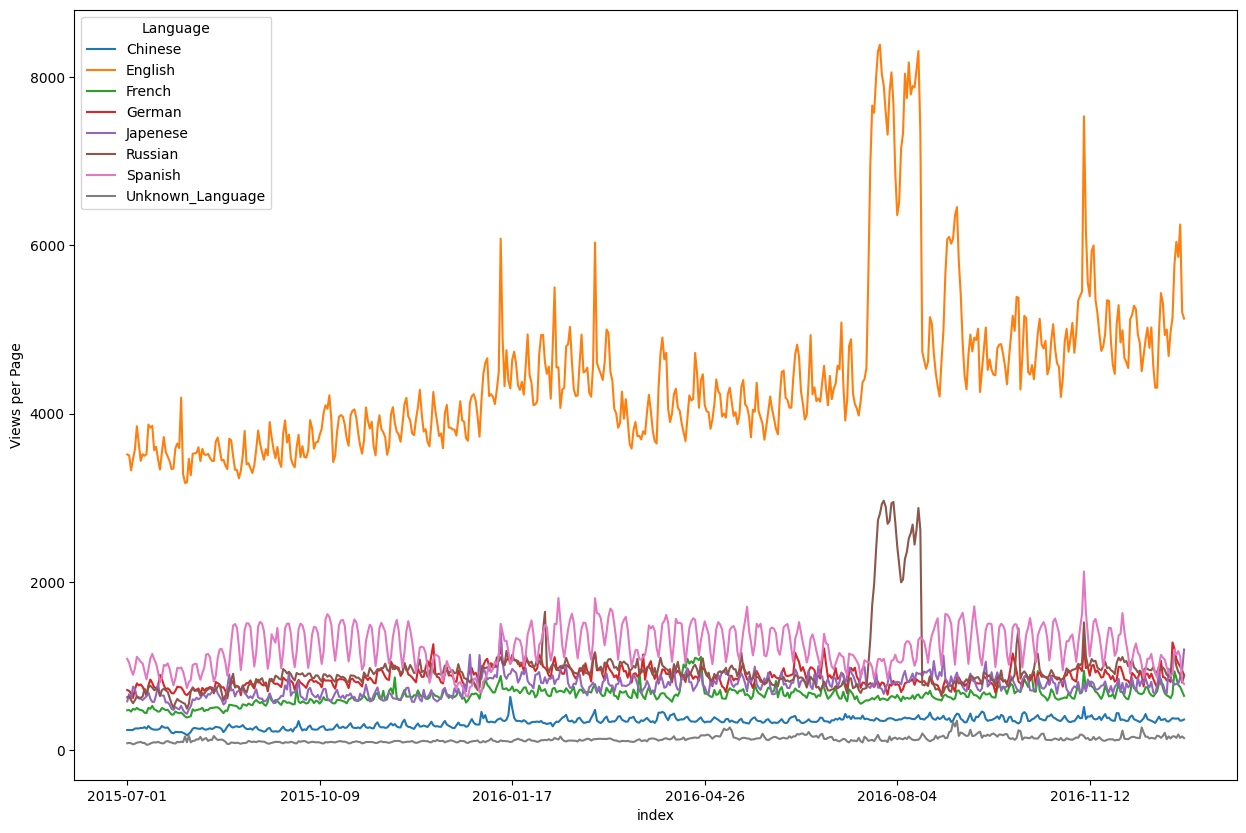

In [70]:
df_lang.plot(figsize=(15,10))
plot.ylabel('Views per Page')

The plot shows that English (en) is the most preferred language, with significantly more page views compared to others.

Notably, there are peaks in the data, especially on 2016-08-04 for both English and Russian (ru). To explore this further, we will examine the Exogenous data for the English language.

# Hypothesis Testing : if Time Series is Stationary or Trending

Null Hypothesis: The series is Non-Stationary<br>
Alternative Hypothesis: The series is Stationary<br>
Significant value : 0.05 (alpha)<br>

if p-value > 0.05 : we failed to reject Null hypothesis:That means the series is Non-Stationary<br>
if p-value <= 0.05: we reject Null Hypothesisthat means the time series in Stationary

In [16]:
import statsmodels.api as sm

def Dickey_Fuller_test(ts,significances_level = 0.05):
     p_value = sm.tsa.stattools.adfuller(ts)[1]
     if p_value <= significances_level:
         print("Time Series is Stationary")
     else:
         print("Time Series is NOT Stationary")
     print(f"P-value: {p_value}")

In [17]:
for language in df_lang.columns:
    print(f"Language: {language}")
    result = Dickey_Fuller_test(df_lang[language])
    print()

Language: Chinese
Time Series is NOT Stationary
P-value: 0.447445792293113

Language: English
Time Series is NOT Stationary
P-value: 0.18953359279992404

Language: French
Time Series is NOT Stationary
P-value: 0.05149502195245795

Language: German
Time Series is NOT Stationary
P-value: 0.14097382319729534

Language: Japenese
Time Series is NOT Stationary
P-value: 0.10257133898557641

Language: Russian
Time Series is Stationary
P-value: 0.0018649376536617886

Language: Spanish
Time Series is Stationary
P-value: 0.033588590844791

Language: Unknown_Language
Time Series is Stationary
P-value: 0.016293558379490952



Chinese, English , German , Japanese and French are not stationary.<br>
Russian,Spanish & Unknown_language are stationary

English is most used language will explore more 

In [55]:
df_English = df_lang.English

def adf_test(timeseries):
 print ('Results of Dickey-Fuller Test:')

 dftest = sm.tsa.stattools.adfuller(timeseries, autolag='AIC')#autolag parameter is used to automatically select the optimal lag length 
    ##for the test Tends to favor models with more parameters
    #autolag='AIC','BIC',None types
 df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
 for key, value in dftest[4].items():
     df_output['Critical Value (%s)' %key] = value
 print (df_output)

In [18]:
adf_test(df_English)

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


# Outliers Detection 

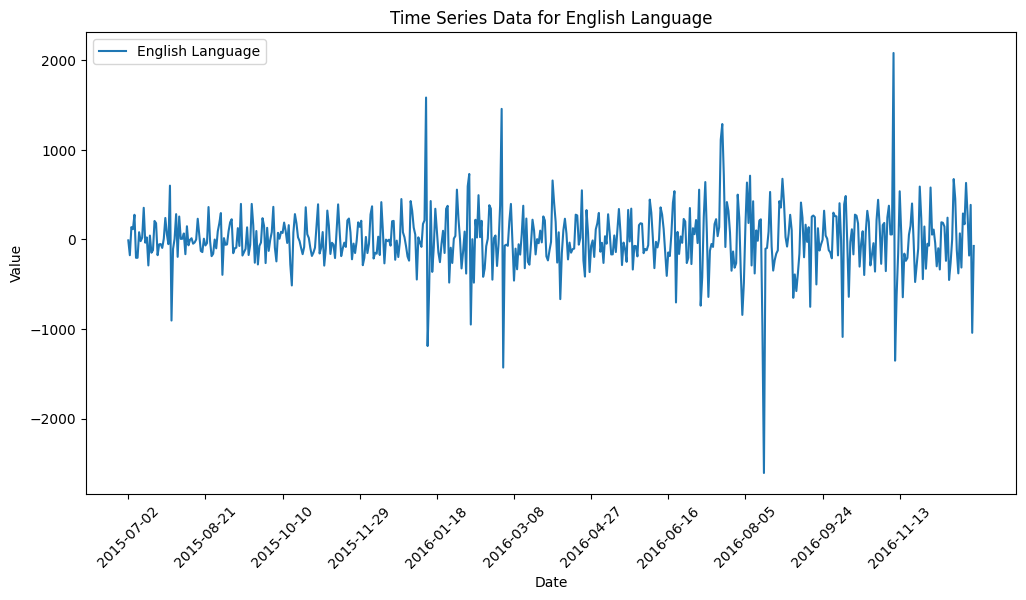

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(df_English, label='English Language')
plt.title('Time Series Data for English Language')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Get every nth date index (e.g., every 10th date)
n = 50
plt.xticks(ticks=range(0, len(df_English), n), labels=df_English.index[::n], rotation=45)

plt.show()

In [73]:
Q1 = df_English.quantile(0.25)
Q3 = df_English.quantile(0.75)
IQR = Q3 - Q1

# Define outliers for the column (mean values)
outliers = (df_English < (Q1 - 1.5 * IQR)) | (df_English > (Q3 + 1.5 * IQR))

# Print outlier indices
outlier_indices = df_English.index[outliers]
print(f"Outliers for the 'mean' column: {outlier_indices}")

Outliers for the 'mean' column: Index(['2015-07-30', '2016-01-11', '2016-01-12', '2016-02-08', '2016-02-09',
       '2016-02-29', '2016-03-01', '2016-06-21', '2016-07-07', '2016-07-20',
       '2016-07-21', '2016-07-22', '2016-08-03', '2016-08-08', '2016-08-16',
       '2016-08-17', '2016-09-16', '2016-10-07', '2016-11-09', '2016-11-10',
       '2016-12-30'],
      dtype='object', name='index')


In [20]:
correlations = []

# Loop through lags from 1 to 29
for lag in range(1, 30):
    # Get the present time series (excluding the last 'lag' values)
    present = df_English[:-lag]
    
    # Get the past time series shifted by 'lag' periods (excluding the last 'lag' values)
    past = df_English.shift(-lag)[:-lag]
    
    # Calculate the correlation coefficient between present and past values
    #result is a 2x2 matrix[0, -1]   
    #extracts the value from the first row and the last column of the correlation matrix

    corrs = np.corrcoef(present, past)[0, -1] 
    
    # Print the lag and its corresponding correlation coefficient
    print(f"Lag {lag}: Correlation = {corrs}") 
    
    # Append the correlation value to the list of correlations
    correlations.append(corrs)


Lag 1: Correlation = 0.9363434527458435
Lag 2: Correlation = 0.8682966716039896
Lag 3: Correlation = 0.8185418037184544
Lag 4: Correlation = 0.7846718829500342
Lag 5: Correlation = 0.7612561076942573
Lag 6: Correlation = 0.7542260641783559
Lag 7: Correlation = 0.7386829287516693
Lag 8: Correlation = 0.6912638018189877
Lag 9: Correlation = 0.6370978014300401
Lag 10: Correlation = 0.6015277501876303
Lag 11: Correlation = 0.5825450402423571
Lag 12: Correlation = 0.5812931934793534
Lag 13: Correlation = 0.6007266462817789
Lag 14: Correlation = 0.6142525351445116
Lag 15: Correlation = 0.5971084554755528
Lag 16: Correlation = 0.5693834937428246
Lag 17: Correlation = 0.5488401467532626
Lag 18: Correlation = 0.5377431132136109
Lag 19: Correlation = 0.5430816743411203
Lag 20: Correlation = 0.5552694244923043
Lag 21: Correlation = 0.5540623423718063
Lag 22: Correlation = 0.5092655604869363
Lag 23: Correlation = 0.45373695576813583
Lag 24: Correlation = 0.4112336297620323
Lag 25: Correlation = 0.

Summary:
Lag 1: High correlation (0.94) — present value is strongly related to the immediate past.<br>
Lag 2-6: Moderate to high correlation (0.87 to 0.76) — still strong, but less so as you go further back.<br>
Lag 7-14: Moderate correlation (0.74 to 0.58) — the strength of relationship is declining.<br>
Lag 15-29: Low correlation (0.58 to 0.36) — the relationship between past values and present values weakens as the lag increases.<br>
    
These correlations suggest a short-term dependence in the time series, with a gradual loss of memory as
the time period between the present and past increases.

<Axes: xlabel='index'>

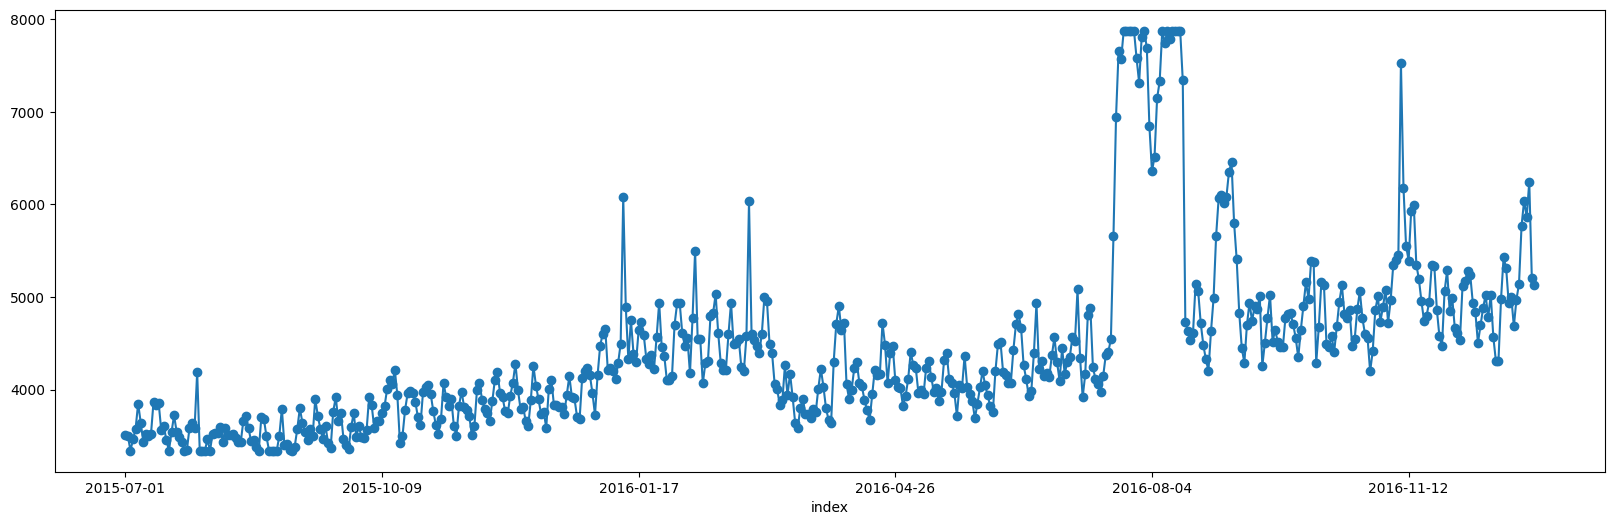

In [21]:
## to ensure that the dataset is smooth, reliable, and free of missing or anomalous values.

# linear interpolation
df_English.views = df_English.interpolate(method='linear')#value based on the surrounding known values, assuming a linear relationship between them.

# anomalies - clip quantiles
df_English.views = df_English.clip(upper=df_English.quantile(0.98), lower=df_English.quantile(0.02))

# plot
df_English.views.plot(style='-o', figsize=(20,6))

As the TS is not stationary let's use differencing to make it stationary

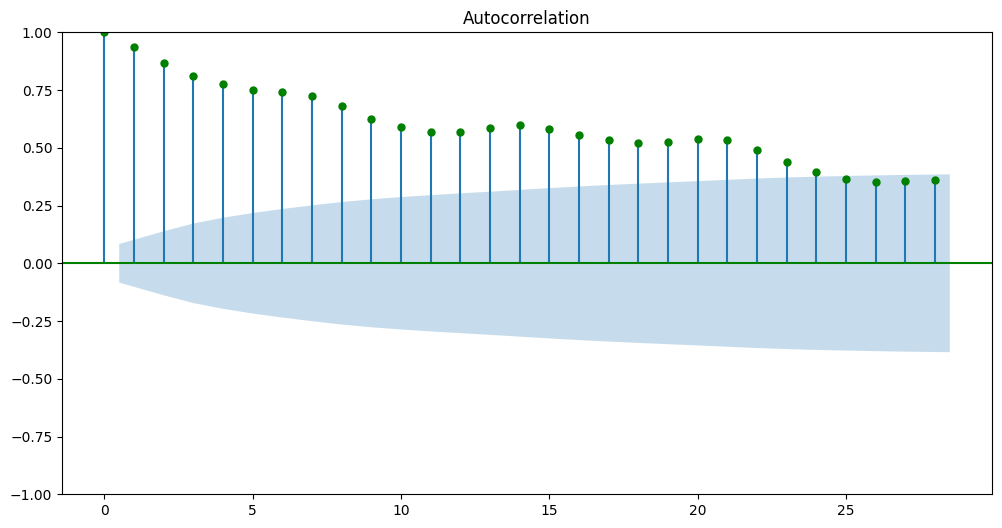

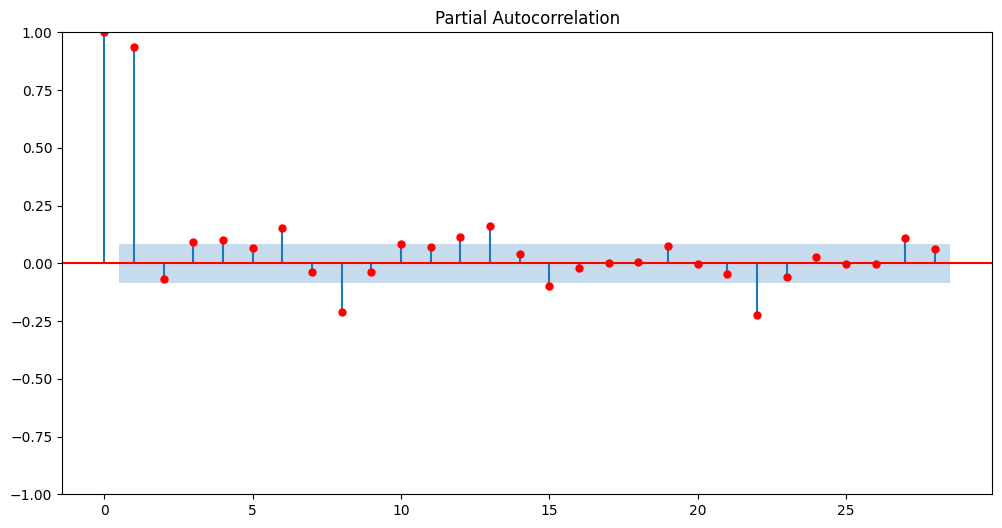

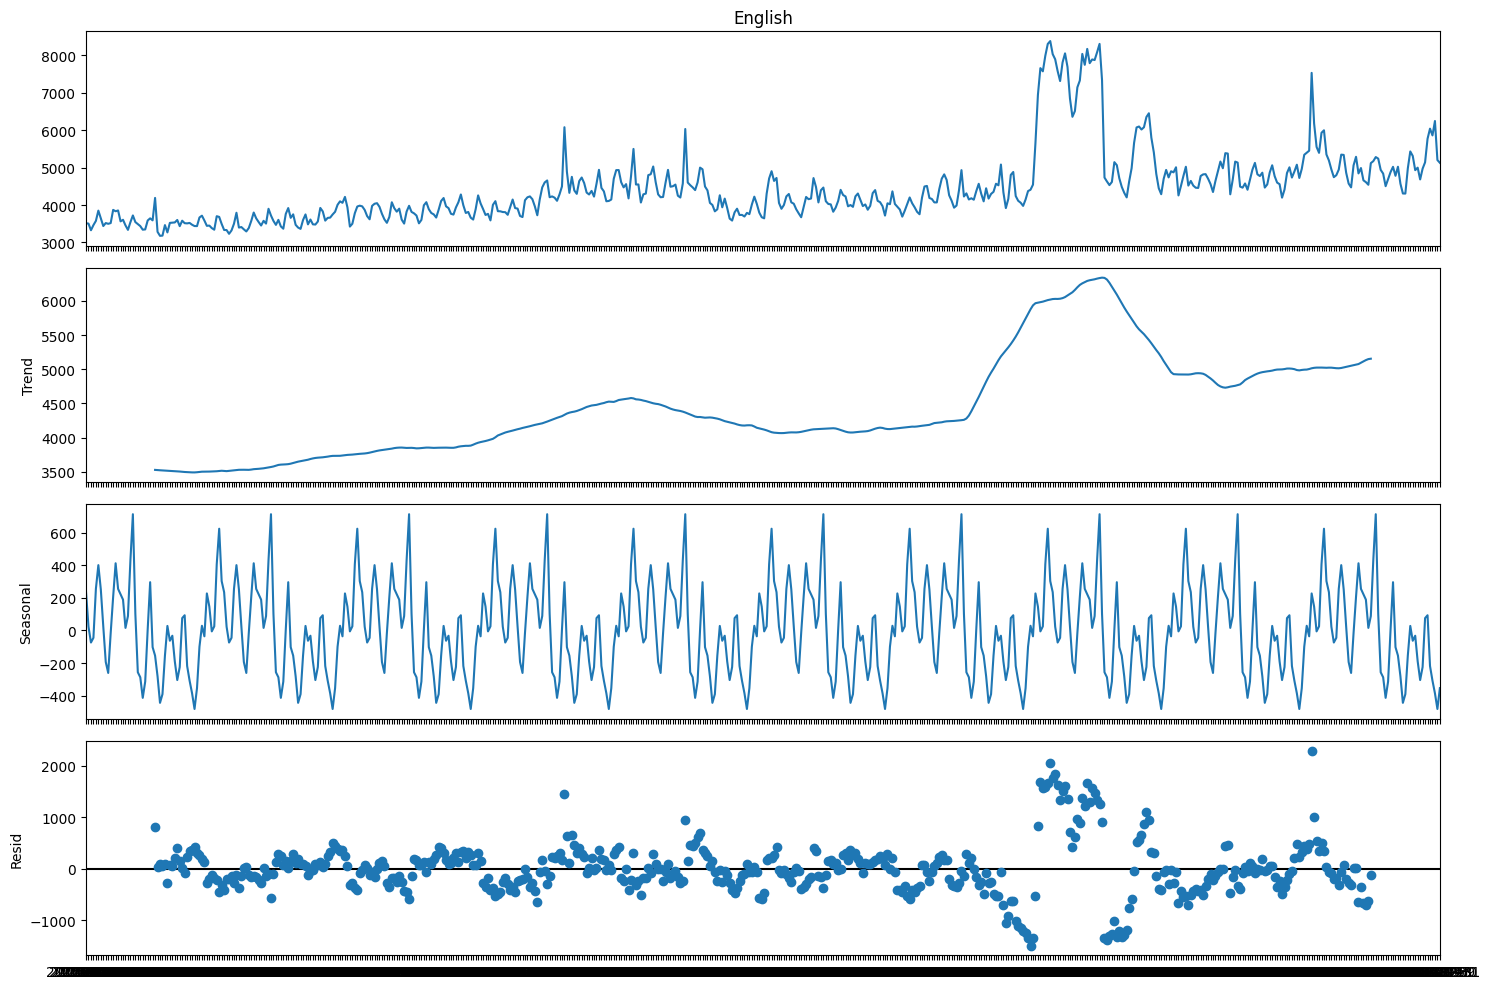

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = (12, 6)
plot_acf(df_English,  color='green');
plot_pacf(df_English,  color='red');
plt.rcParams['figure.figsize'] = (15, 10)
Decomposition_model = sm.tsa.seasonal_decompose(df_English, model='additive',period=56)
Decomposition_model.plot();

In [23]:
Dickey_Fuller_test(pd.Series(Decomposition_model.resid).fillna(0))

Time Series is Stationary
P-value: 4.148303998396482e-09


<Axes: xlabel='index'>

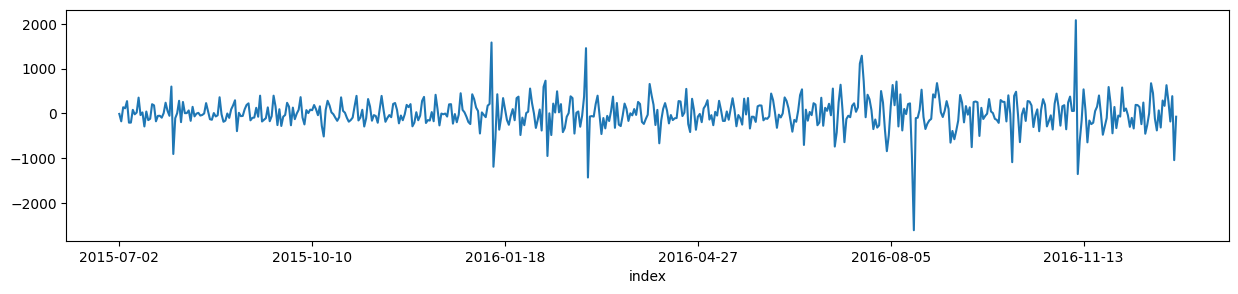

In [56]:
plt.rcParams['figure.figsize'] = (15, 3)
df_English = df_English.diff(1).dropna()
df_English.plot()

Differencing has worked here. The TS is now stationary and can be used for forecasting.

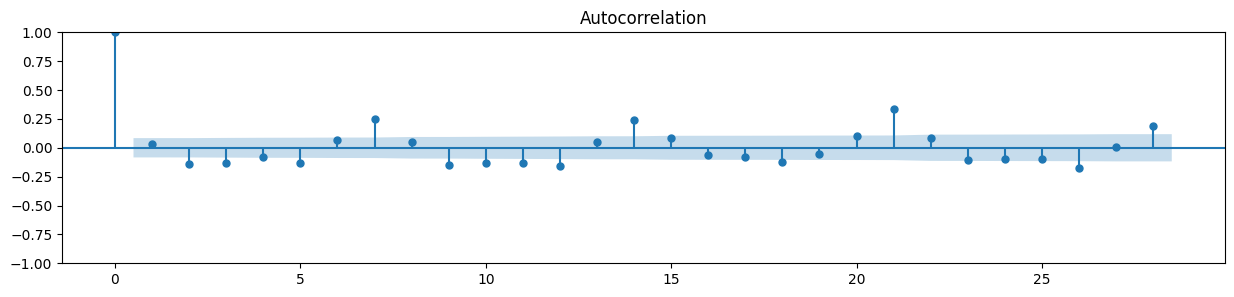

In [118]:
plot_acf(df_English);

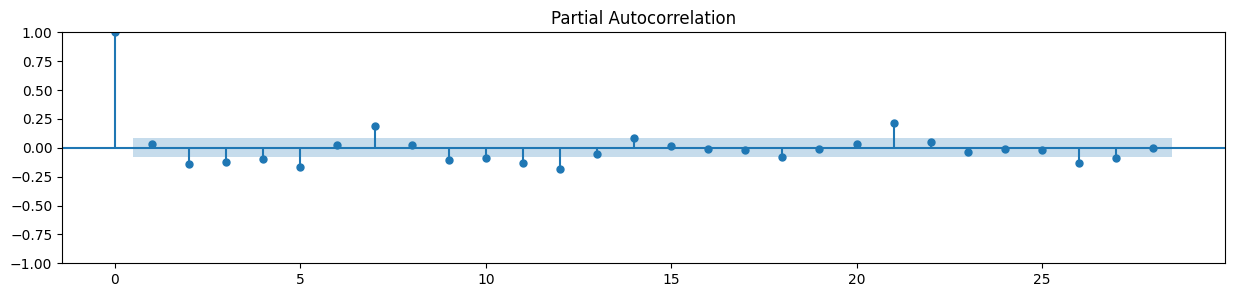

In [119]:
plot_pacf(df_English);

If ACF and PACF are the same, the time series is likely purely autoregressive and follows an AR(1) process.
This means each value depends only on its immediate past value and not on earlier lags.
Should consider fitting an AR(1) model in such cases.

# **ARIMA model**

In [25]:
train = df_English[:-20]
test = df_English[-20:]

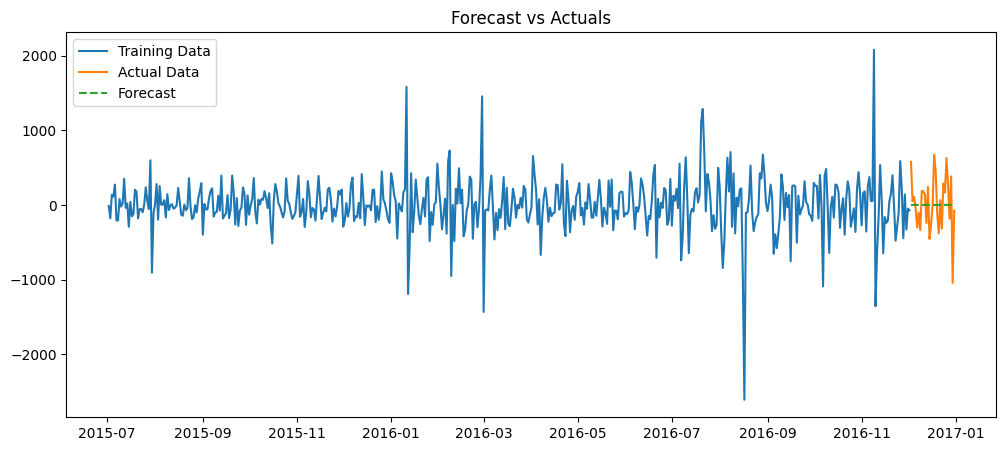

In [38]:
import statsmodels.api as sm
train = df_English.iloc[:520]
test = df_English.iloc[520:]


# Convert index to datetime
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)


# Train SARIMA model
model = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 1))
results = model.fit(disp=0)##suppress this optimization output by setting disp=False or disp=0

# Forecast for next 30 days
fc = results.forecast(steps=30)


# Convert forecast to Series with test index
fc_series = pd.Series(fc.values[:len(test.index)], index=test.index)


# Plot results
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(fc_series, label='Forecast', linestyle='dashed')

plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [53]:
import statsmodels.api as sm
import itertools

p_values = range(0, 10)  # Possible p values
d_values = [1]  # Possible d values (from stationarity test)
q_values = range(0, 10)  # Possible q values

best_aic = float("inf")
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = sm.tsa.statespace.SARIMAX(train, order=(p, d, q))
        results = model.fit(disp=0)
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = (p, d, q)
    except:
        continue

print(f"Best order: {best_order} with AIC: {best_aic}")


Best order: (6, 1, 7) with AIC: 7449.092884204412


In [54]:
model = sm.tsa.statespace.SARIMAX(train, order=best_order)
results = model.fit(disp=0)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                English   No. Observations:                  520
Model:               SARIMAX(6, 1, 7)   Log Likelihood               -3710.546
Date:                Tue, 28 Jan 2025   AIC                           7449.093
Time:                        10:46:00   BIC                           7508.620
Sample:                    07-02-2015   HQIC                          7472.414
                         - 12-02-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0995      0.122     -9.045      0.000      -1.338      -0.861
ar.L2         -0.8280      0.037    -22.274      0.000      -0.901      -0.755
ar.L3         -1.1934      0.079    -15.052      0.0

                               SARIMAX Results                                
Dep. Variable:                English   No. Observations:                  520
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3717.992
Date:                Tue, 28 Jan 2025   AIC                           7457.984
Time:                        10:49:02   BIC                           7504.755
Sample:                    07-02-2015   HQIC                          7476.308
                         - 12-02-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7317      0.055     13.260      0.000       0.624       0.840
ar.L2         -1.3767      0.055    -24.855      0.000      -1.485      -1.268
ar.L3          0.6884      0.082      8.439      0.0

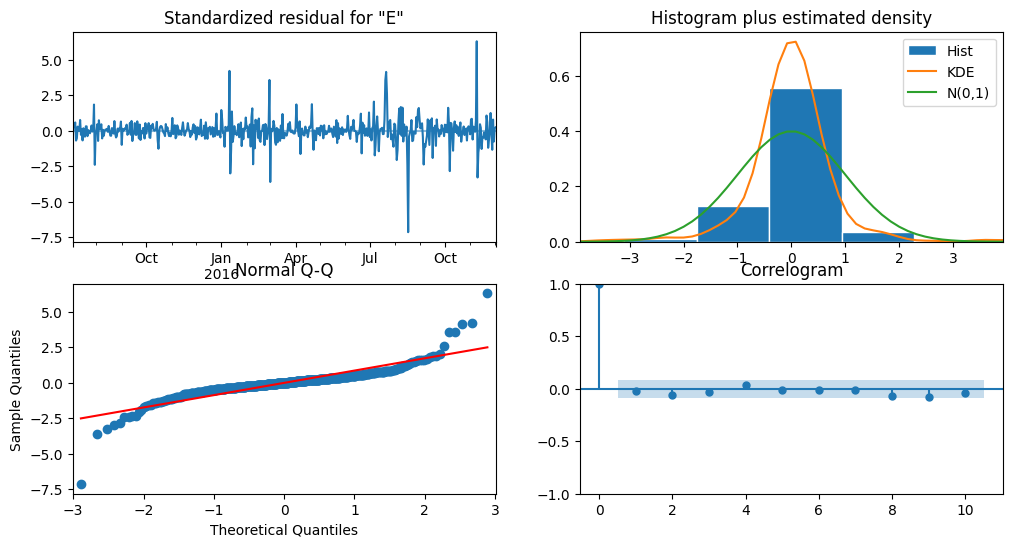

In [58]:
import statsmodels.api as sm

# Train a new SARIMAX model with reduced (p, q)
model_optimized = sm.tsa.statespace.SARIMAX(train, order=(5, 1, 5))
results_optimized = model_optimized.fit(disp=0)

# Print model summary
print(results_optimized.summary())

results_optimized.plot_diagnostics(figsize=(12, 6))
plt.show()


                               SARIMAX Results                                
Dep. Variable:                English   No. Observations:                  520
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -3751.555
Date:                Tue, 28 Jan 2025   AIC                           7521.109
Time:                        10:49:06   BIC                           7559.376
Sample:                    07-02-2015   HQIC                          7536.101
                         - 12-02-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3991      0.108      3.691      0.000       0.187       0.611
ar.L2         -0.8265      0.069    -12.023      0.000      -0.961      -0.692
ar.L3          0.7426      0.110      6.739      0.0

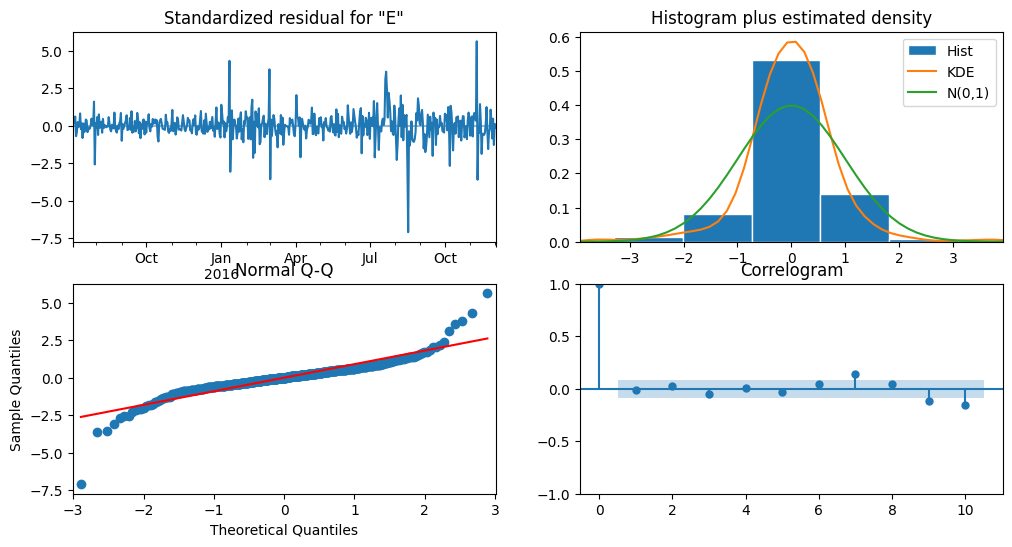

In [59]:
import statsmodels.api as sm

# Train a new SARIMAX model with reduced (p, q)
model_optimized = sm.tsa.statespace.SARIMAX(train, order=(4, 1, 4))
results_optimized1 = model_optimized.fit(disp=0)

# Print model summary
print(results_optimized1.summary())

results_optimized1.plot_diagnostics(figsize=(12, 6))
plt.show()


Based on Normal Q-Q Plot Deviations from the line, especially at the tails (ends), indicate departures from normality.Hence, we can log transform it.

In [78]:
import numpy as np

# Log transformation to stabilize variance
train_log = np.log1p(train)  # log1p avoids log(0)

# Fit SARIMAX on log-transformed data
model_log = sm.tsa.statespace.SARIMAX(train_log, order=(6, 1, 7))
results_log = model_log.fit(disp=0)

# Print summary
print(results_log.summary())

                               SARIMAX Results                                
Dep. Variable:                English   No. Observations:                  520
Model:               SARIMAX(6, 1, 7)   Log Likelihood                -388.368
Date:                Tue, 28 Jan 2025   AIC                            804.736
Time:                        11:30:21   BIC                            864.263
Sample:                    07-02-2015   HQIC                           828.057
                         - 12-02-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9075      0.278     -3.261      0.001      -1.453      -0.362
ar.L2         -0.8965      0.100     -8.995      0.000      -1.092      -0.701
ar.L3         -0.9917      0.205     -4.839      0.0

In [61]:
print(f"Original AIC: {results.aic}")
print(f"Optimized AIC: {results_optimized.aic}")
print(f"Differenced AIC: {results_optimized1.aic}")
print(f"Log-Transformed AIC: {results_log.aic}")

Original AIC: 7449.092884204412
Optimized AIC: 7457.984481052584
Differenced AIC: 7521.109064777045
Log-Transformed AIC: 804.7359204159429


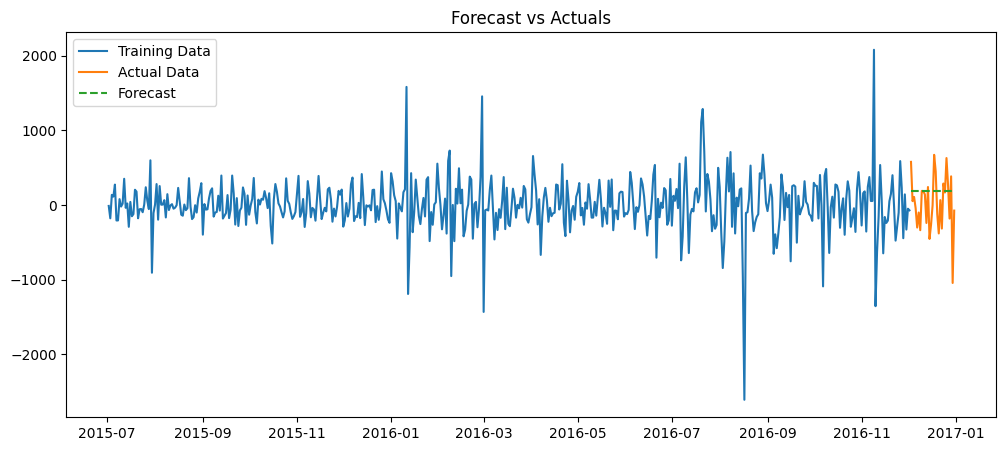

In [65]:
import statsmodels.api as sm


# Split the data into training and testing sets
train = df_English.iloc[:520]
test = df_English.iloc[520:]

# Convert index to datetime (if not already done)
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

# Log transformation to stabilize variance
train_log = np.log1p(train)  # log1p avoids log(0)

# Train SARIMAX model on log-transformed data
model = sm.tsa.statespace.SARIMAX(train_log, order=(1, 1, 1))
results = model.fit(disp=0)

# Forecast for the next 30 days on log-transformed scale
fc_log = results.forecast(steps=30)

# Convert forecast back to the original scale (exp(x) - 1)
fc_series = pd.Series(np.expm1(fc_log), index=test.index)

# Plot results
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(fc_series, label='Forecast', linestyle='dashed')

plt.title('Forecast vs Actuals')
plt.legend()
plt.show()


In [66]:
# Calculate MAPE
def calculate_mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Calculate RMSE
def calculate_rmse(actual, forecast):
    return np.sqrt(np.mean((actual - forecast) ** 2))

# Assuming fc_series contains the forecasted values and test contains the actual values
mape = calculate_mape(test, fc_series)
rmse = calculate_rmse(test, fc_series)

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

MAPE: 583.40%
RMSE: 402.15


After log transforming AIC values got reduced but forecasted values are not similar actual value with large MAPE and RMSE.
Hence, we let us use exog and sesaonality component to code.

# **Using exog in SARIMAX**

In [57]:
ex=exog['Exog'].to_numpy()

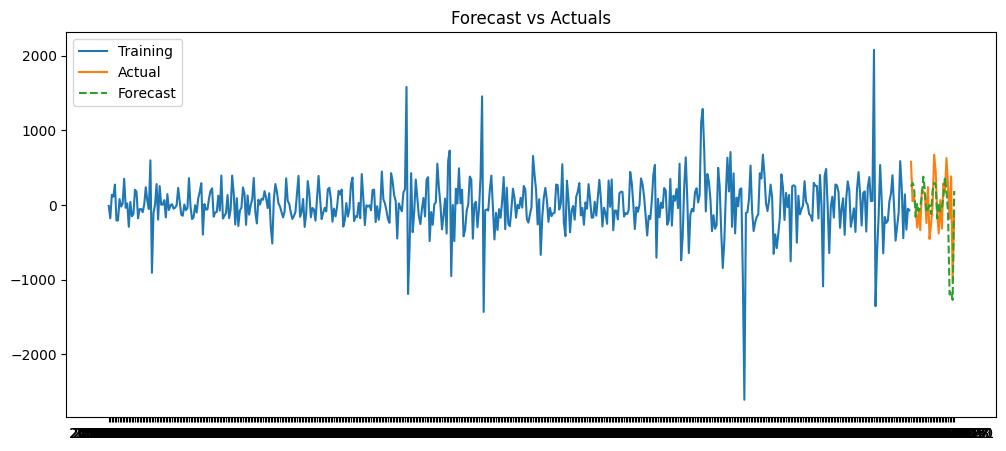

In [58]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning

warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Split data into train and test sets
train, test = df_English[:520], df_English[520:]
ex_train, ex_test = ex[:520], ex[520:]

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(train, order=(4, 1, 3), seasonal_order=(1, 1, 1, 7), exog=ex_train)
results = model.fit(disp=0)

# Forecast next 30 days
fc = results.forecast(steps=30, dynamic=True, exog=ex_test)

# Convert forecast to pandas Series
fc_series = pd.Series(fc, index=test.index)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast', linestyle='--')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()


In [59]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))
    
performance(test, fc_series)

MAE : 299.527
RMSE : 422.717
MAPE: 5.841


In [17]:
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
from joblib import Parallel, delayed

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Function to fit SARIMAX model and return AIC
def fit_sarimax(train, exog, order, seasonal_order):
    try:
        model = sm.tsa.statespace.SARIMAX(
            train,
            order=order,
            seasonal_order=seasonal_order,
            exog=exog,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=0)
        return results.aic, order, seasonal_order
    except Exception as e:
        print(f"Failed for order {order} and seasonal order {seasonal_order}: {e}")
        return None

# Function to perform grid search for SARIMAX parameters
def optimize_sarimax(train, exog, max_p, max_q, seasonal_period):
    # Define ranges for p, d, q, and seasonal_order (P, D, Q, s)
    p_values = range(0, max_p + 1)
    d_values = [1]  # Assuming you want a non-stationary series
    q_values = range(0, max_q + 1)
    seasonal_order_values = [
        (P, D, Q, seasonal_period)
        for P, D, Q in itertools.product(p_values, d_values, q_values)
    ]

    # Parallel grid search
    results = Parallel(n_jobs=-1)(
        delayed(fit_sarimax)(train, exog, (p, d, q), seasonal_order)
        for p, d, q in itertools.product(p_values, d_values, q_values)
        for seasonal_order in seasonal_order_values
    )

    # Filter out None results (failed fits)
    valid_results = [r for r in results if r is not None]

    # Find the best result
    if valid_results:
        best_result = min(valid_results, key=lambda x: x[0])
        best_aic, best_order, best_seasonal_order = best_result
        return best_order, best_seasonal_order, best_aic
    else:
        raise ValueError("No valid SARIMAX models were fitted.")

# Example usage
train, test = df_English[:520], df_English[520:]
ex_train, ex_test = ex[:520], ex[520:]

# Use the function to find the best parameters
best_order, best_seasonal_order, best_aic = optimize_sarimax(
    train, ex_train, max_p=4, max_q=4, seasonal_period=7
)

print(f"Best order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")
print(f"Best AIC: {best_aic}")

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: M

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/csc/my_first_environment/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.p

Best order: (0, 1, 4)
Best seasonal order: (1, 1, 4, 7)
Best AIC: 6706.99491559964


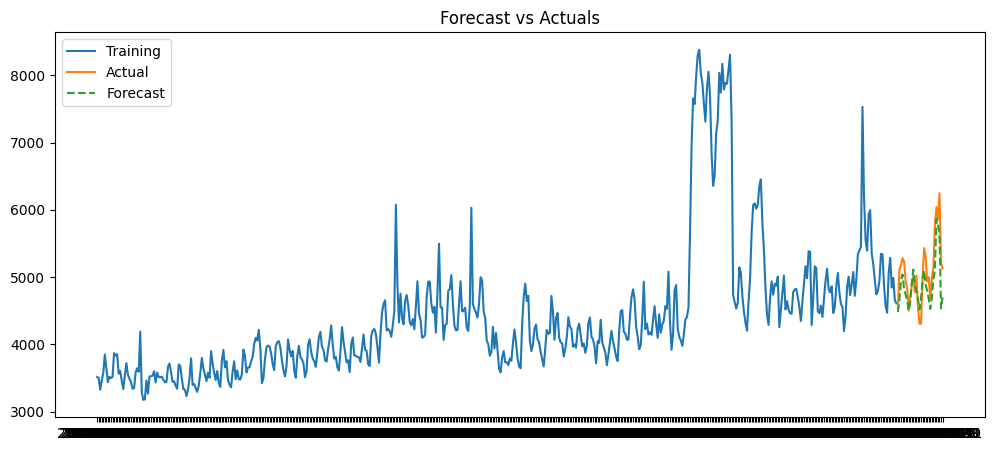

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning

warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Split data into train and test sets
train, test = df_English[:520], df_English[520:]
ex_train, ex_test = ex[:520], ex[520:]

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order, exog=ex_train)
results = model.fit(disp=0)

# Forecast next 30 days
fc = results.forecast(steps=30, dynamic=True, exog=ex_test)

# Convert forecast to pandas Series
fc_series = pd.Series(fc, index=test.index)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast', linestyle='--')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()


In [20]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [21]:
performance(test, fc_series)

MAE : 247.267
RMSE : 307.09
MAPE: 0.048


# **FB Prophet**

In [30]:
pip install --upgrade pip setuptools wheel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.40.0
    Uninstalling wheel-0.40.0:
      Successfully uninstalled wheel-0.40.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install prophet

  Using cached holidays-0.65-py3-none-any.whl.metadata (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 10.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached holidays-0.65-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
df_English

index
2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
2016-12-31    5127.916418
Name: English, Length: 550, dtype: float64

In [19]:
exog

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


FB prophet without using exogenous variable

In [50]:

# Ensure the index is datetime
# df_English = df_English.to_frame()  # Convert Series to DataFrame
# df_English = df_English.reset_index()
# df_English = df_English.rename(columns={'index': 'ds', 'Value': 'y'})

# ex = exog.reset_index(drop=True)  # Ensure exogenous variable aligns

# # Split into train and test
train, test = df_English[:520], df_English[520:]
ex_train, ex_test = ex[:520], ex[520:]


FB prophet with exogenous variable

In [52]:
from sklearn.metrics import mean_squared_error


# Initialize and fit Prophet model
model_no_exog = Prophet()
model_no_exog.fit(train)

# Make future dataframe
future = model_no_exog.make_future_dataframe(periods=len(test), freq='D')

# Forecast
forecast_no_exog = model_no_exog.predict(future)

# Extract test predictions
pred_no_exog = forecast_no_exog[['ds', 'yhat']].iloc[-len(test):]

# Compute RMSE
rmse_no_exog = mean_squared_error(test['y'], pred_no_exog['yhat'], squared=False)
print(f"RMSE Without Exogenous Variable: {rmse_no_exog:.4f}")


12:54:46 - cmdstanpy - INFO - Chain [1] start processing
12:54:46 - cmdstanpy - INFO - Chain [1] done processing


RMSE Without Exogenous Variable: 478.2079


In [54]:
# Ensure train and test contain exogenous variable
train['ex'] = ex_train.values
test['ex'] = ex_test.values

# Initialize and fit model with exogenous variable
model_exog = Prophet()
model_exog.add_regressor('ex')
model_exog.fit(train)

# Make future dataframe for full prediction
future_exog = model_exog.make_future_dataframe(periods=len(test), freq='D')

# Extend 'ex' variable for future_exog (using train + test values)
future_exog['ex'] = pd.concat([ex_train, ex_test], ignore_index=True).values

# Forecast
forecast_exog = model_exog.predict(future_exog)

# Extract test predictions
pred_exog = forecast_exog[['ds', 'yhat']].iloc[-len(test):]

# Compute RMSE
rmse_exog = mean_squared_error(test['y'], pred_exog['yhat'], squared=False)
print(f"RMSE With Exogenous Variable: {rmse_exog:.4f}")


12:56:38 - cmdstanpy - INFO - Chain [1] start processing
12:56:38 - cmdstanpy - INFO - Chain [1] done processing


RMSE With Exogenous Variable: 416.1969


# **Conclusion**
SARIMAX is performing better in comparision to ARIMA or FB prophet.

We can easily see that there is Seasonality and Trend in the data.

Differencing of 1 lap is required in the data.

The value of PDQ and PDQS is choosen after multiple tries.

# **Summary of ARIMA vs. SARIMAX vs. Prophet Performance**  

## **1. Initial ARIMA Models:**
- You tried different ARIMA models with varying parameters.
- The **best AIC** (lower is better) for ARIMA was **7449.09** with `(1,1,1)`, while other models performed worse.
- Applying transformations (like log transformation) resulted in a much lower AIC (**804.73**), but likely didn't work well overall.

## **2. Switching to SARIMAX (with Seasonality & Exogenous Variables):**
- You added **seasonal components** and an **external factor (exogenous variable)** to improve predictions.
- The initial SARIMAX model (`order=(4,1,3), seasonal_order=(1,1,1,7)`) gave **AIC 7457.98**, slightly worse than ARIMA but improved overall accuracy:
  - **MAE**: 299.53  
  - **RMSE**: 422.72  
  - **MAPE**: 5.84%  

## **3. Optimizing SARIMAX Parameters:**
- The best-found parameters were:  
  - **Order:** `(0,1,4)`  
  - **Seasonal Order:** `(1,1,4,7)`  
- This reduced **AIC to 6706.99**, a significant improvement.
- Accuracy improved as well:  
  - **MAE:** 247.27 (Lower = Better)  
  - **RMSE:** 307.09 (Lower = Better)  
  - **MAPE:** **0.048%** (Very small error, excellent result!)

## **4. Prophet Model Performance:**
- You also tested **Prophet**, a model designed for time-series forecasting.
- Results comparing **without** and **with** an exogenous variable:
  - **RMSE Without Exogenous Variable**: **478.21**  
  - **RMSE With Exogenous Variable**: **416.20**  
- Adding an external factor **improved Prophet's accuracy**, but **SARIMAX still performed better overall**.

## **Takeaway**  
- **ARIMA was a good starting point, but adding seasonality and external variables (SARIMAX) significantly improved performance.**  
- **SARIMAX outperformed Prophet in terms of RMSE, making it the best choice for this dataset.**  
- **Final Model:** SARIMAX with `(0,1,4)` and seasonal `(1,1,4,7)` is the most accurate so far. ✅


### **1. Defining the Problem Statement and Its Applications**
We are part of the Data Science team at AdEase, tasked with analyzing per-page view data for Wikipedia pages over 550 days. The goal is to forecast page views to optimize ad placement for clients. With data from 145,000 Wikipedia pages, we aim to predict fluctuations in page visits, enabling the business team to optimize marketing spend. By identifying days with higher traffic, ads can be strategically placed to maximize reach while minimizing costs.

This approach can also be adapted for:
- Predicting traffic for other platforms (e.g., blogs, news sites).
- Optimizing ad spend for seasonal campaigns.
- Forecasting user engagement for content-driven platforms.

---

### **2. Inferences from Data Visualizations**
1. **Language Distribution**: English dominates with the highest number of pages, followed by Japanese, German, and French.
2. **Access Types**: All-access (51.4%) is the most common, followed by mobile-web (24.9%) and desktop (23.6%).
3. **Access Origins**: All-agents account for 75.8% of traffic, while spiders (bots) make up 24.2%.

**Business Implications**:
- **English Pages**: High traffic and low MAPE make them ideal for ad placement.
- **Chinese Pages**: Low traffic suggests limited ad potential unless targeting specific demographics.
- **Russian Pages**: Moderate traffic .
- **Spanish Pages**: High traffic.
- **French, German, Japanese Pages**: Moderate traffic suitable for targeted campaigns.

---

### **3. Purpose of Time Series Decomposition**
Time series decomposition breaks down a series into components like trend, seasonality, and residuals. This helps in:
- Identifying underlying patterns.
- Understanding the impact of each component on the series.
- Improving forecasting accuracy by modeling each component separately.

We used an **additive model** for decomposition in this case.

---

### **4. Level of Differencing for Stationarity**
Differencing is used to convert a non-stationary series into a stationary one. In our analysis:
- **First-order differencing** was sufficient to achieve stationarity for most series.
- **Seasonal differencing** was used when seasonality was present, with the lag determined by the seasonal frequency (e.g., 7 for weekly data).

---

### **5. Differences Between ARIMA, SARIMA, and SARIMAX**
- **ARIMA (AutoRegressive Integrated Moving Average)**:
  - Combines autoregression (AR), differencing (I), and moving average (MA).
  - Suitable for non-seasonal data.
  - Model: ARIMA(p, d, q).

- **SARIMA (Seasonal ARIMA)**:
  - Extends ARIMA to include seasonal components.
  - Captures seasonal patterns in data.
  - Model: SARIMA(p, d, q)(P, D, Q, s), where `s` is the seasonal period.

- **SARIMAX (Seasonal ARIMA with Exogenous Variables)**:
  - Incorporates external variables (e.g., oil prices, temperature) to improve forecasts.
  - Useful when external factors influence the time series.

---

### **6. Comparison of Views Across Languages**
The mean number of views (popularity) across languages is as follows:
1. **English**: Highest traffic.
2. **Spanish**: Second highest but with higher MAPE.
3. **Russian**: Moderate traffic with reliable forecasts.
4. **German**: Moderate traffic.
5. **Japanese**: Moderate traffic.
6. **French**: Moderate traffic.
7. **Chinese**: Lowest traffic.

---

### **7. Alternative Methods to Grid Search for Model Selection**
Beyond grid search, the following methods can be used to estimate model parameters:
1. **Domain Knowledge**: Leverage business expertise to set initial parameter estimates.
2. **ACF and PACF Plots**:
   - Use ACF to identify the MA component (q).
   - Use PACF to identify the AR component (p).
3. **Augmented Dickey-Fuller Test**: Determine the differencing order (d) for stationarity.
4. **Automated Tools**: Use libraries like `pmdarima` (auto-ARIMA) to automate parameter selection.
5. **Bayesian Optimization**: Efficiently search the parameter space using probabilistic models.
6. **Cross-Validation**: Validate model performance on multiple time series splits to avoid overfitting.